<a href="https://colab.research.google.com/github/sadat1971/PyTorch_practice/blob/main/003_pytorch_training_neural_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training a classifier in PyTorch

In [3]:
import torch
import torchvision
from torchvision import transforms

In [5]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# The PIL images are within the range [0,1]. We need to transform them to the [-1, 1] rnage. For that, we need to
# set mean to 0.5 and std to 0.5 as well. So, 0 becomes (0-0.5)/0.5 = -1 and 1 becomes (1-0.5)/0.5 = 1

In [6]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


## How do the downloaded images look like?

In [7]:
import matplotlib.pyplot as plt
import numpy as np

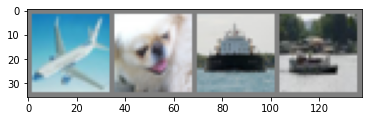

plane   dog  ship  ship


In [8]:
def imshow(image):
  image = image/2 +0.5
  np_convrtd_img = image.numpy()
  plt.imshow(np.transpose(np_convrtd_img, (1, 2, 0)))
  plt.show()

image_iter = iter(trainloader)  # Getting some random images from the training set
image, labels = image_iter.next()


# show images
imshow(torchvision.utils.make_grid(image))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## Building the neural network

In [9]:
import torch.nn as nn
from torch.nn.functional import max_pool2d, relu

In [23]:
class Net(nn.Module):

  def __init__(self):
    super(Net, self).__init__()
    self.Conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2,2)
    self.Conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.Conv1(x)
    x = relu(x)
    x = self.pool(x)
    x = self.pool(relu(self.Conv2(x)))
    x = x.view(-1, 16*5*5)
    x = relu(self.fc2(relu(self.fc1(x))))
    x = self.fc3(x)
    return x

net = Net()

# what does the network look like?

print(net)

Net(
  (Conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


## Defining loss function and the process of optimization

In [24]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## Using all these pieces together, we will train the neural network

In [37]:
# how many times do you want to run the algorithm on your training dataset?

epoch_times = 5 # 5 times

loss_history = []
iteration_history = []
i = 0
for epoch in range(epoch_times):

  running_loss = 0.0  # it will accumulate the total loss

  for idx, data in enumerate(trainloader, 0):
    train_x, train_y = data

    # make the parameters gradient zero to stop accumulating the gradient
    optimizer.zero_grad()

    #forward propagation
    output = net(train_x)

    #loss calculation
    loss = criterion(output, train_y)
    loss_history.append(loss)

    #backpropagation
    loss.backward()

    #update the parameter
    optimizer.step()

    #loss upto this point
    running_loss = running_loss + loss.item()
    i += 1
    iteration_history.append(i)


    # print statistics
    if idx % 2000 == 1999:    # print every 2000 mini-batches
       print(epoch, idx, running_loss/2000)
       running_loss = 0





0 1999 1.2134315979406238
0 3999 1.2162822050079702
0 5999 1.1790192567557096
0 7999 1.1958268813528121
0 9999 1.1672803448233753
0 11999 1.1707394245732576
1 1999 1.0801271546753124
1 3999 1.0993360161185264
1 5999 1.1287170859202742
1 7999 1.1130861049033702
1 9999 1.1104625733383
1 11999 1.1052812334988267
2 1999 1.0397003025850282
2 3999 1.0555638133101166
2 5999 1.0422318976912648
2 7999 1.0584091436439194
2 9999 1.0464257015418261
2 11999 1.0826777709093875
3 1999 0.978240934535861
3 3999 0.9756456707962788
3 5999 0.9931617565238848
3 7999 1.0179376349374651
3 9999 1.0454591083726845
3 11999 1.0415932446373626
4 1999 0.9239369196533226
4 3999 0.9477267825035378
4 5999 0.9760263286188711
4 7999 0.9746758835534565
4 9999 0.9945756270727143
4 11999 0.9629276716192253


## Testing the network performance

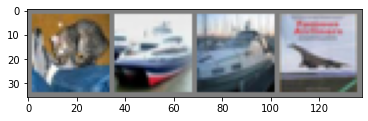

GroundTruth:    cat  ship  ship plane


In [62]:
# Let's first load a batch of test data

dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [68]:
# This is how the outputs look like:
outputs = net(images)
print(outputs)

tensor([[-0.7720, -2.7086, -0.9260,  2.6453, -0.3561,  2.6582, -0.8042,  0.3501,
          0.7799, -0.4324],
        [ 5.1172,  1.9848,  0.2881, -1.3446, -2.5370, -3.5326, -4.0807, -2.9271,
          5.9960,  2.0216],
        [ 1.1113,  1.3505,  0.0397, -0.6228, -0.6312, -0.9007, -0.8794, -0.3484,
         -0.1198,  1.2722],
        [ 2.8878, -0.9337,  0.9267, -1.0144,  0.3804, -1.8909, -1.2482, -2.4499,
          2.5169, -0.3952]], grad_fn=<AddmmBackward>)


In [69]:
# Now, within the outputs, the one indexed with the maximum value will be the prediction
_, predicted = torch.max(outputs, 1)
print(predicted)

tensor([5, 8, 1, 0])


In [76]:
# But what are they?
for i in range(len(predicted)):
  print("Image {} is predicted as {}".format(i, classes[predicted[i]]))

Image 0 is predicted as dog
Image 1 is predicted as ship
Image 2 is predicted as car
Image 3 is predicted as plane


## Now how is the performance in the whole test dataset?


In [77]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 60 %


# Huh, not too bad ! 

In [78]:
# Let's get a bit more inquisitive
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 63 %
Accuracy of   car : 62 %
Accuracy of  bird : 39 %
Accuracy of   cat : 45 %
Accuracy of  deer : 51 %
Accuracy of   dog : 48 %
Accuracy of  frog : 74 %
Accuracy of horse : 66 %
Accuracy of  ship : 74 %
Accuracy of truck : 76 %
